In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

In [3]:
# First let's find all of our data
parentPath='/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/weighted_epsilon'
dataPath=parentPath+'/netPlusBrownDelta'

# Go to the correct parent directory
os.chdir(parentPath)
Files = os.listdir(dataPath)
nFiles = len(Files)

In [4]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def varSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for alpha
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            # Sort by second index
            elif cpy1[i] == cpy1[j]:
                if cpy2[i] > cpy2[j] and i < j:
                    # Swap copy array values
                    cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                    cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                    cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                    # Swap the corresponding indices
                    ind[i], ind[j] = ind[j], ind[i]
                elif cpy2[i] == cpy2[j]:
                    if cpy3[i] > cpy3[j] and i < j:
                        # Swap copy array values
                        cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                        cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                        cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                        # Swap the corresponding indices
                        ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [5]:
# You want to load the data in so that it's sorted to begin with
os.chdir(dataPath)
epsilons = []
peas = []
xas = []
for i in xrange(nFiles):
    epsilons.append(getFromTxt(Files[i], "ep", "_phi"))
    peas.append(getFromTxt(Files[i], "pa", "_pb"))
    xas.append(getFromTxt(Files[i], "xa", "_ep"))
    
# Now sort the array of txtFile names
indArr = varSort(peas, xas, epsilons)
indSort(Files, indArr)
indSort(epsilons, indArr)
for i in xrange(nFiles): print(Files[i])

pa0_pb500_xa0_ep93_phi60.txt
pa0_pb500_xa10_ep85_phi60.txt
pa0_pb500_xa20_ep76_phi60.txt
pa0_pb500_xa30_ep68_phi60.txt
pa0_pb500_xa40_ep60_phi60.txt
pa0_pb500_xa50_ep51_phi60.txt
pa0_pb500_xa60_ep43_phi60.txt
pa0_pb500_xa70_ep35_phi60.txt
pa0_pb500_xa80_ep26_phi60.txt
pa0_pb500_xa90_ep18_phi60.txt
pa0_pb500_xa100_ep10_phi60.txt
pa150_pb500_xa10_ep87_phi60.txt
pa150_pb500_xa20_ep81_phi60.txt
pa150_pb500_xa40_ep70_phi60.txt
pa150_pb500_xa50_ep64_phi60.txt
pa150_pb500_xa60_ep58_phi60.txt
pa150_pb500_xa70_ep52_phi60.txt
pa150_pb500_xa80_ep46_phi60.txt
pa150_pb500_xa90_ep40_phi60.txt
pa150_pb500_xa100_ep35_phi60.txt


In [9]:
# Read in the data in pandas dataframes
sims = []
os.chdir(dataPath)
for i in xrange(nFiles):
    df = pd.read_csv(Files[i], sep='\s+', header=0)
    sims.append(df)
    
# display(sims[0])
print(sims[0]['ALL'][0])

1.0003


In [41]:
# # Okay, now we have the delta values, plot them in a nice way
# import seaborn as sns
# import math
# for i in xrange(nFiles):
#     sns.distplot(sims[i]['ALL'], hist=True)
#     plotAA = sims[i]['AA'][~np.isnan(sims[i]['AA'])]
#     plotAB = sims[i]['AB'][~np.isnan(sims[i]['AB'])]
#     plotBB = sims[i]['BB'][~np.isnan(sims[i]['BB'])]
#     sns.distplot(plotAA, hist=False)
#     sns.distplot(plotAB, hist=False)
#     sns.distplot(plotBB, hist=False)
#     plt.xlabel(r'Center-to-center distance $(\delta)$')
#     plt.ylabel(r'Population')
#     plt.show()

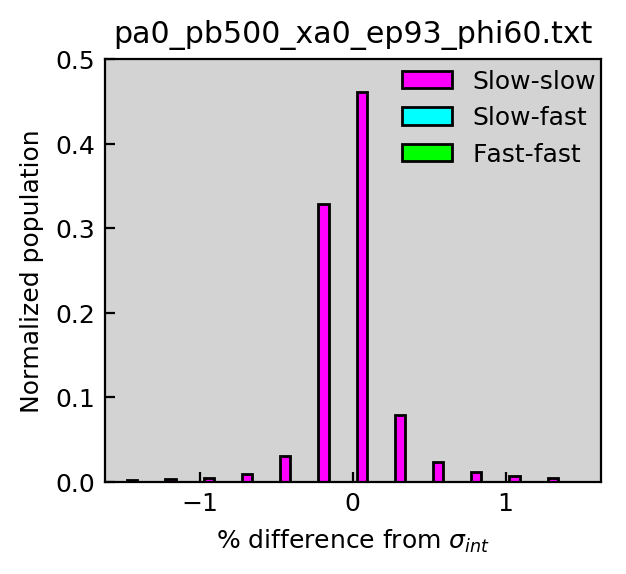

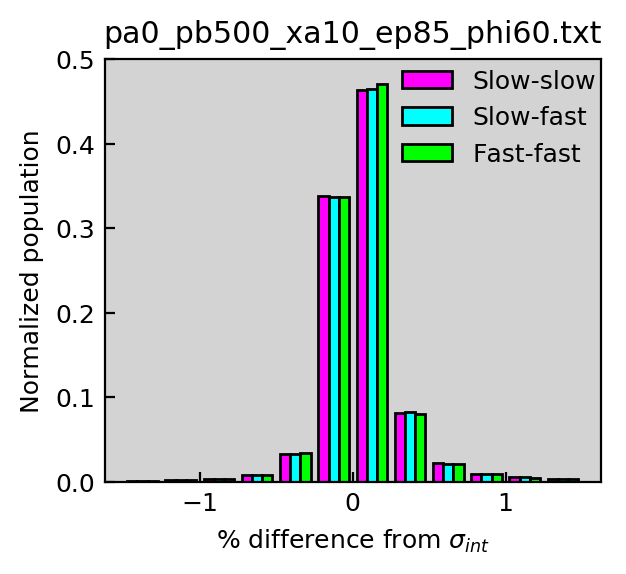

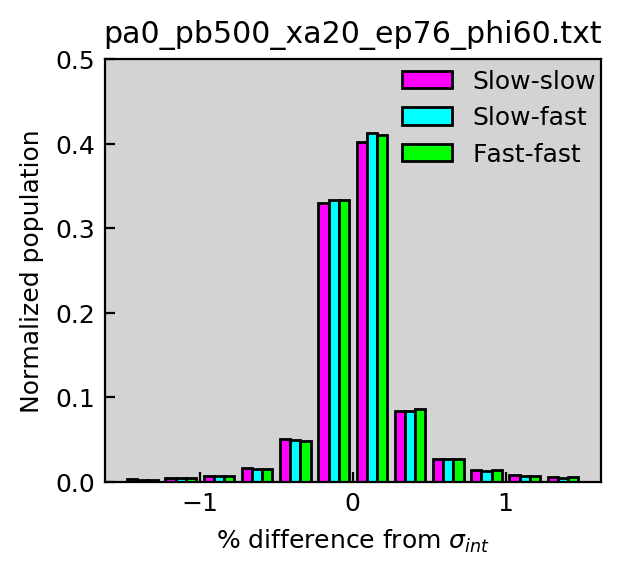

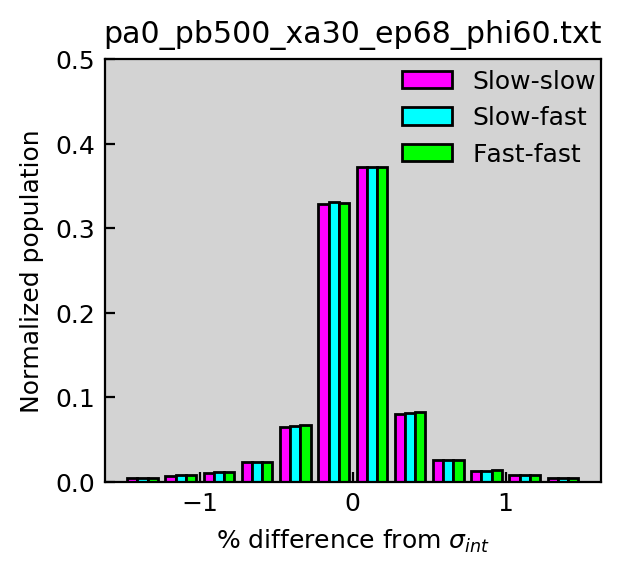

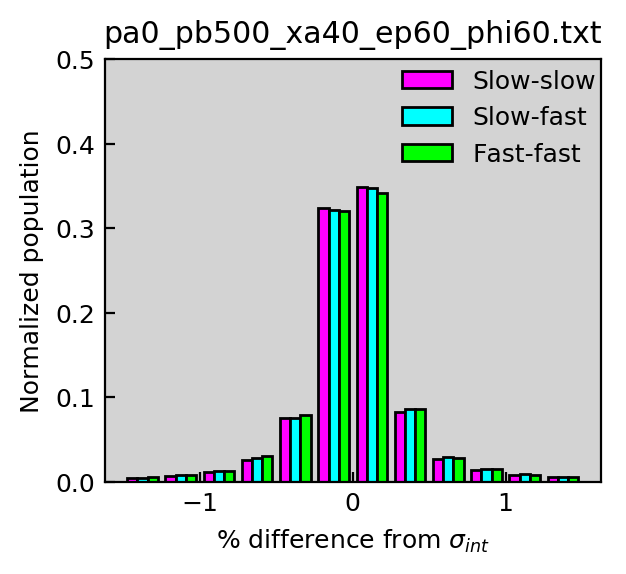

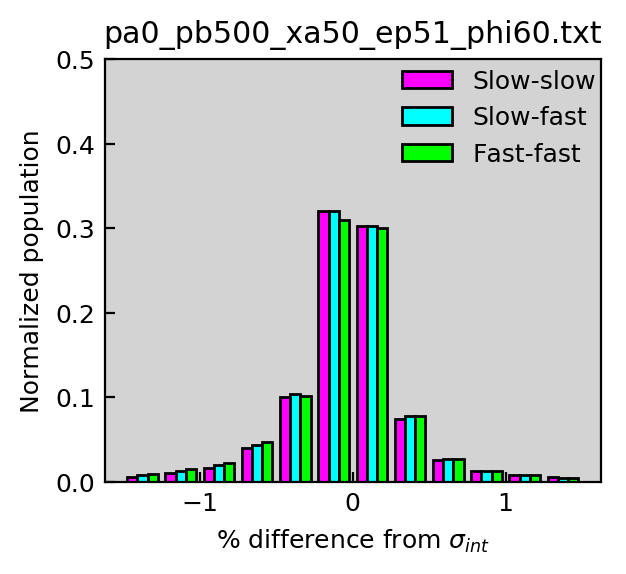

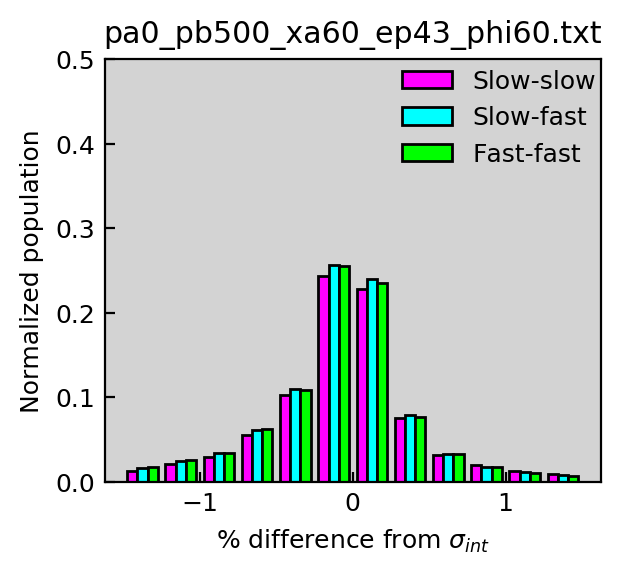

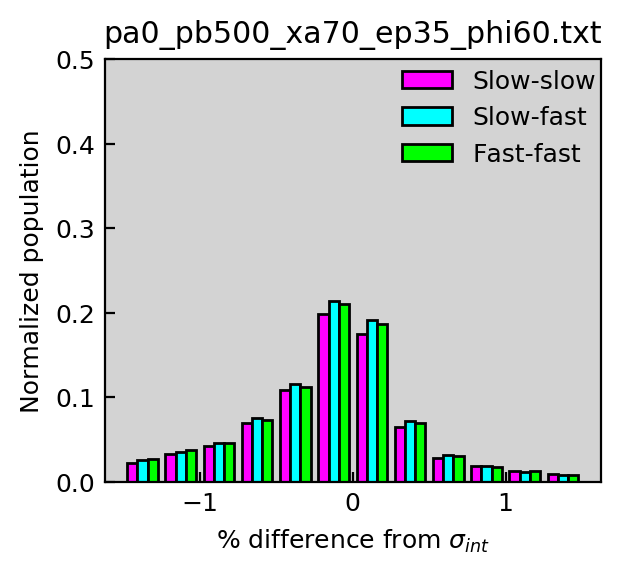

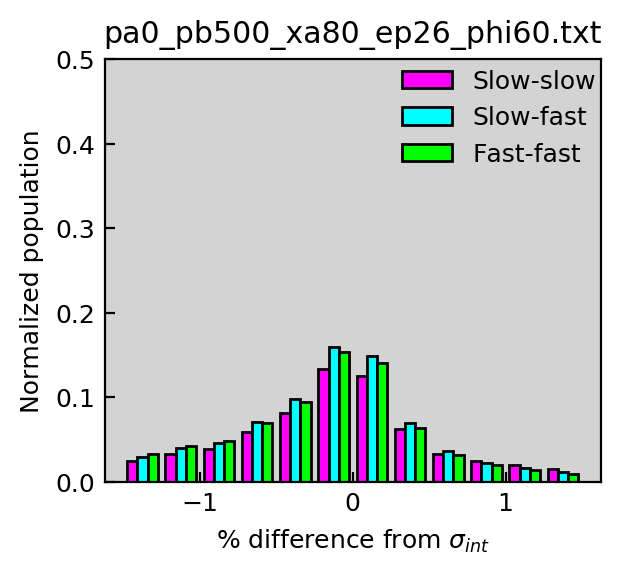

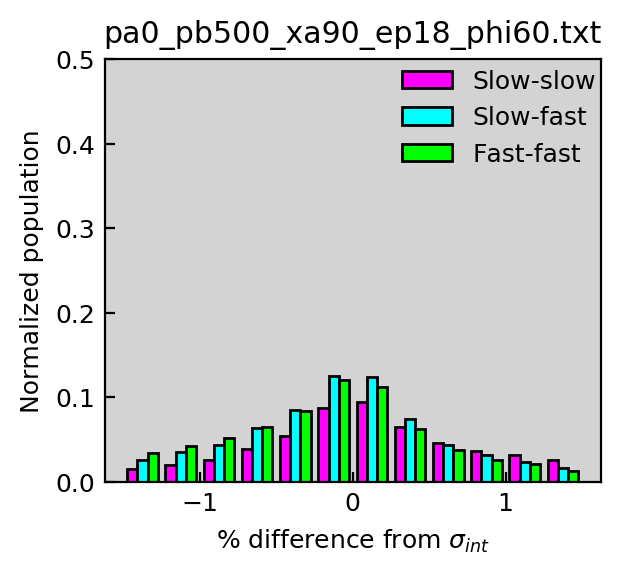

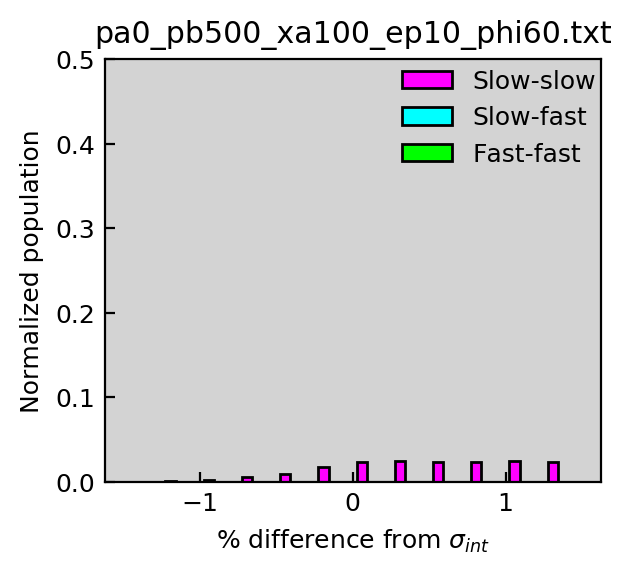

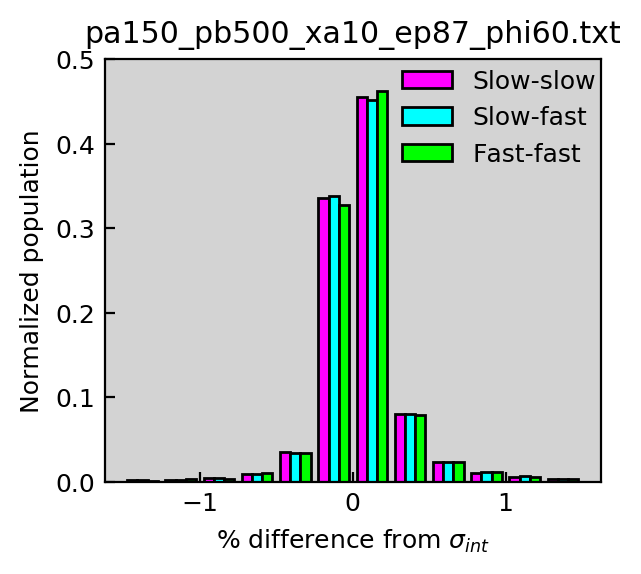

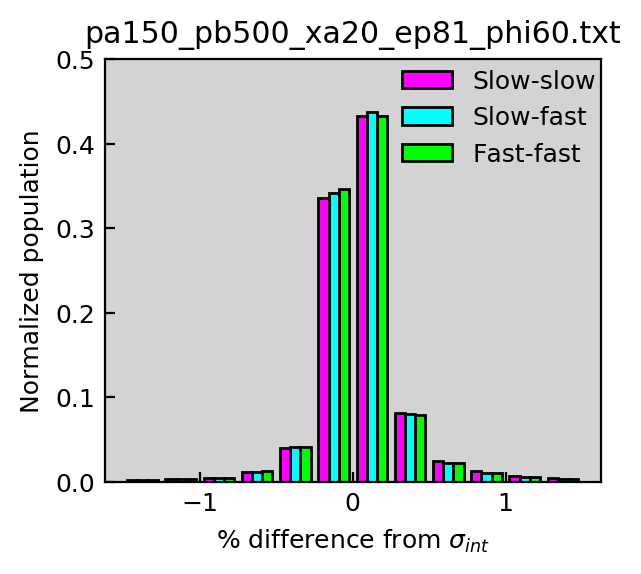

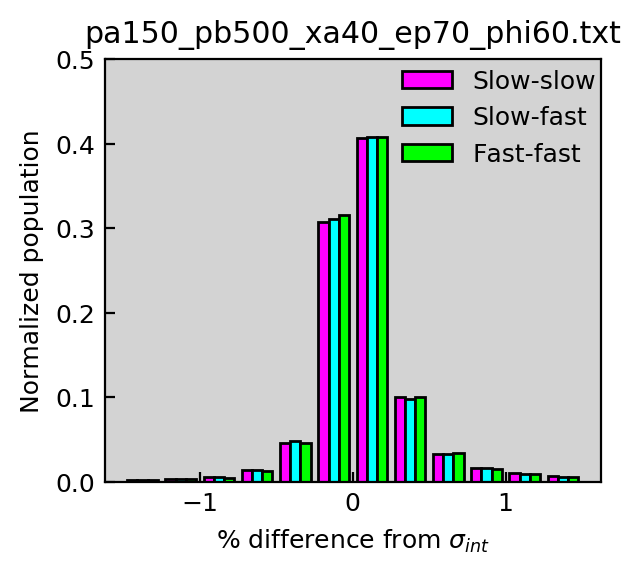

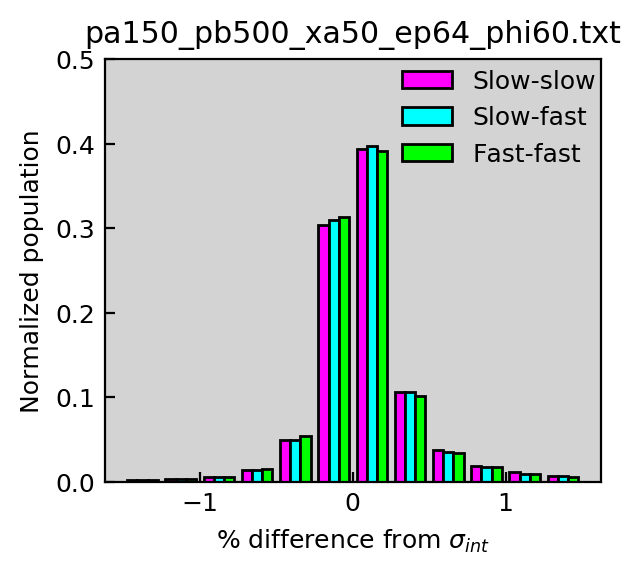

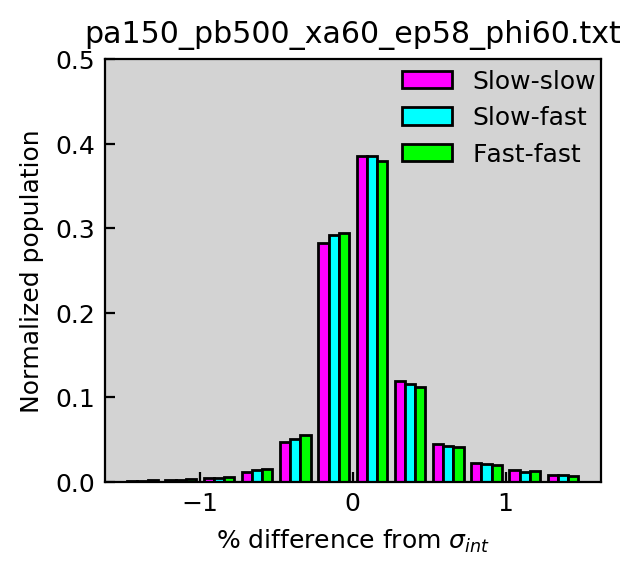

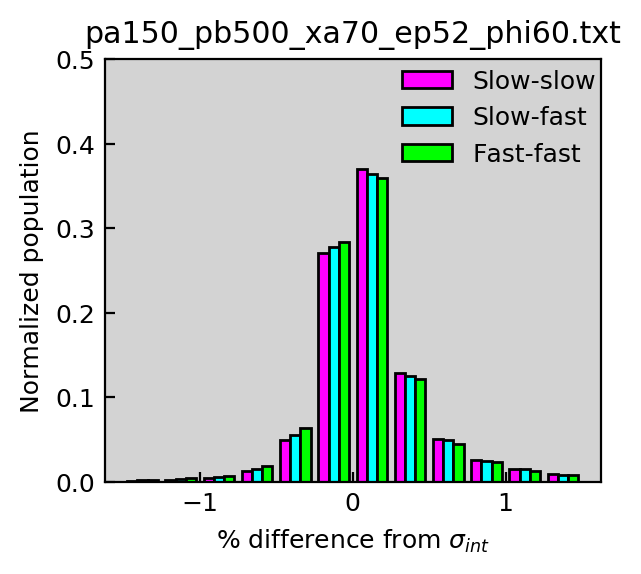

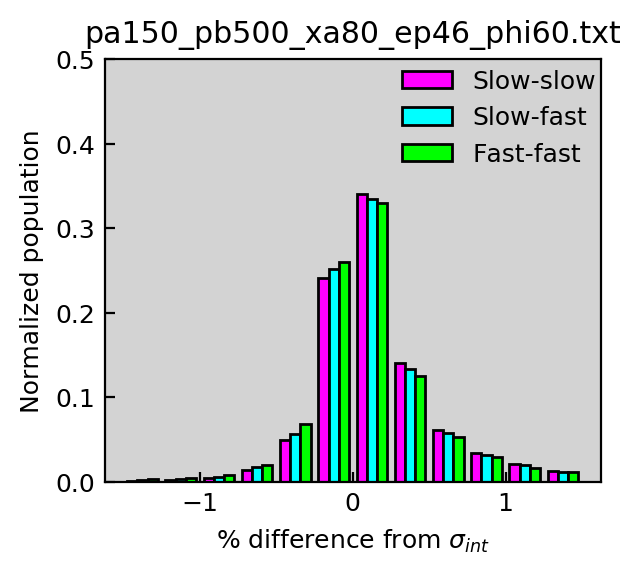

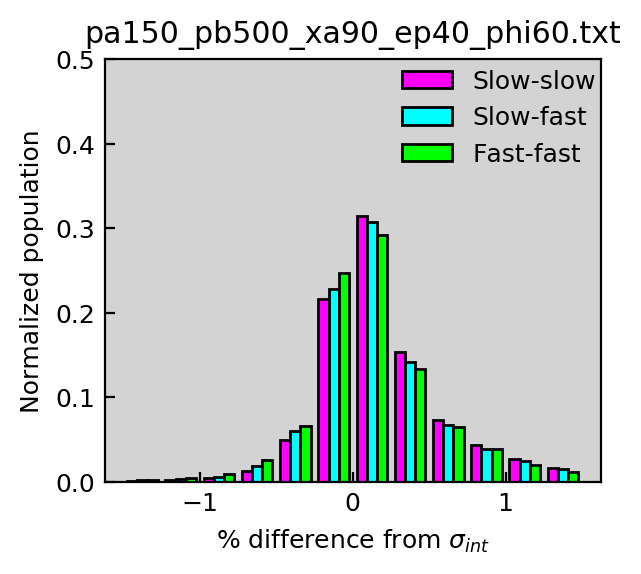

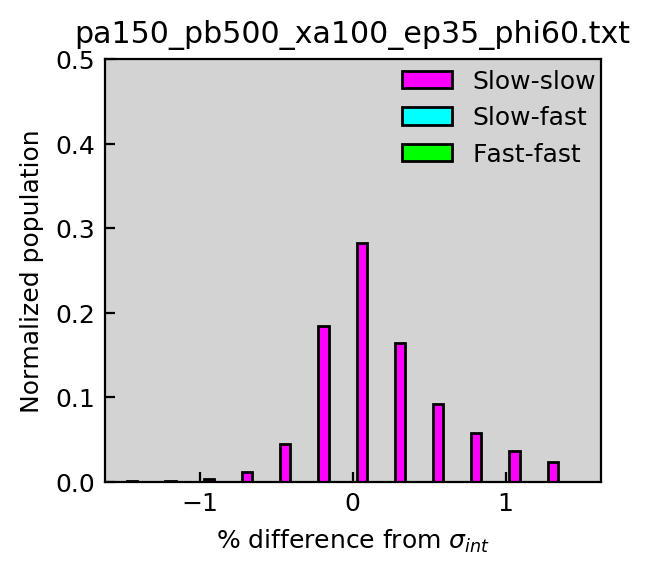

In [106]:
# Diameter histogram in terms of percent
headers = list(sims[0])
headers.remove('ALL')
overlayLabl = ['Slow-slow', 'Slow-fast', 'Fast-fast']
overlayColr = ['#ff00ff', '#00ffff', '#00ff00']
for i in xrange(nFiles):
    overlayData = []
    overlayWeig = []
    fig, ax = plt.subplots()
    for j in headers:
        plotDat = sims[i][j][~np.isnan(sims[i][j])]
        plotDat -= 1.0
        plotDat *= 100.0
        weights = np.ones_like(plotDat) / float(len(plotDat))
        overlayData.append(plotDat)
        overlayWeig.append(weights)
#         ax.hist(plotDat, weights=weights, bins=100, range=(0.9, 1.1), histtype='step', label=j)
    ax.hist(overlayData, weights=overlayWeig,
            bins=12, range=(-1.5, 1.5),
            label=overlayLabl,
            color=overlayColr,
            edgecolor='k')
#     ax.set_xlim(0.9875, 1.0125)
    ax.set_ylim(0, 0.5)
    ax.set_xlabel(r'% difference from $\sigma_{int}$')
    ax.set_ylabel(r'Normalized population')
    ax.set_facecolor('#d3d3d3')
    ax.set_title(Files[i])
    plt.legend(bbox_to_anchor=(0.58, 1), loc=2, borderaxespad=0., frameon=False)
    plt.show()
    plt.close()

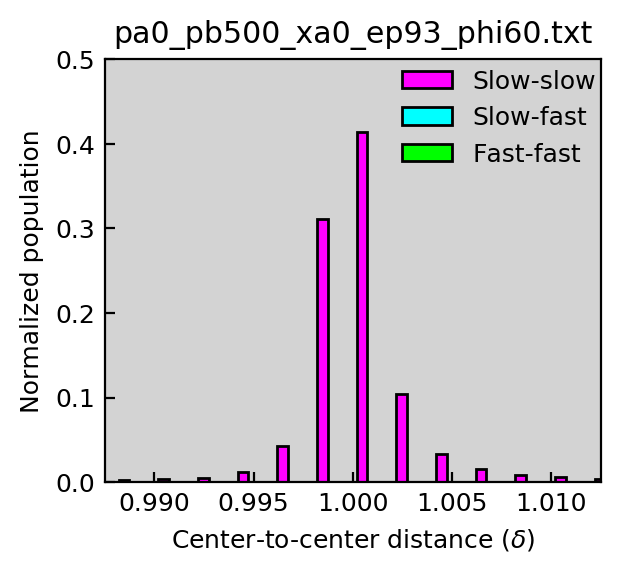

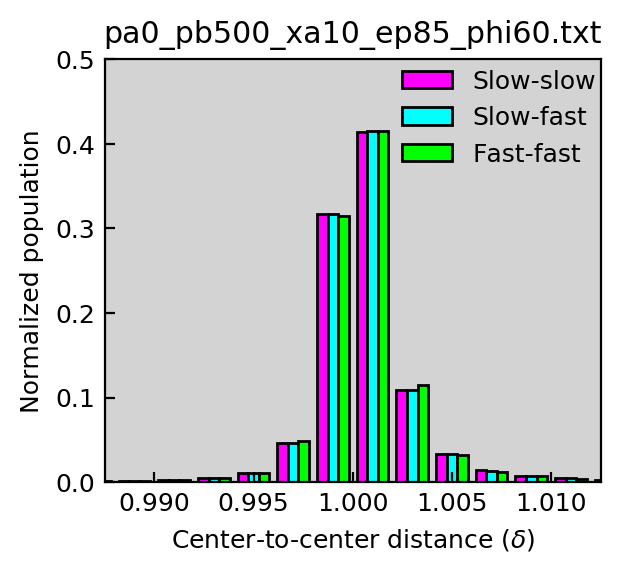

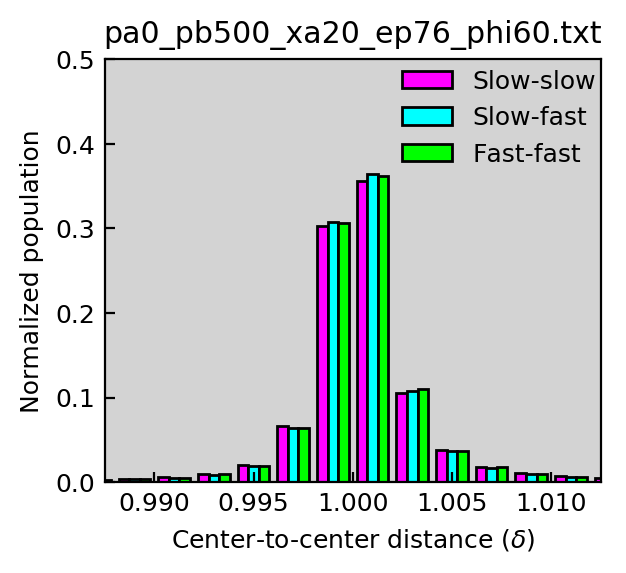

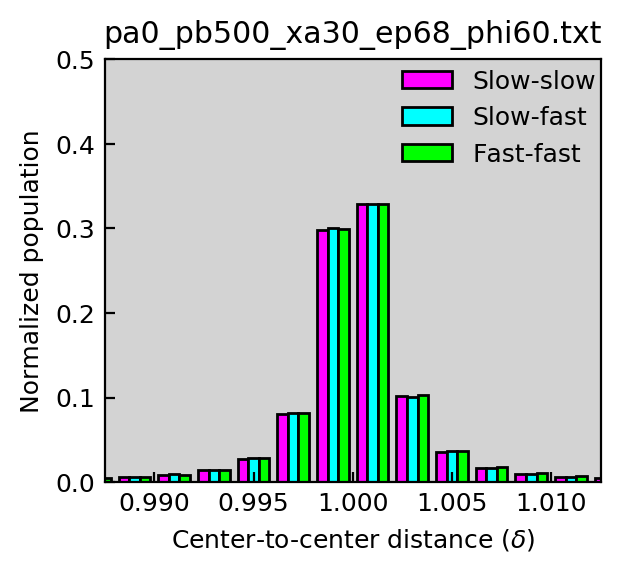

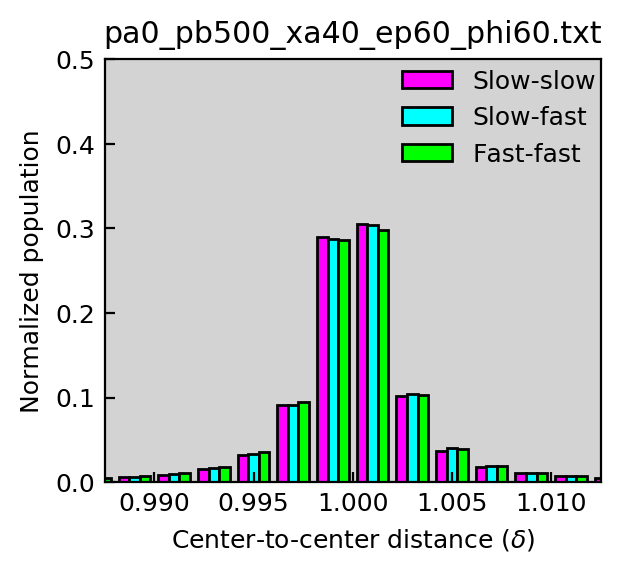

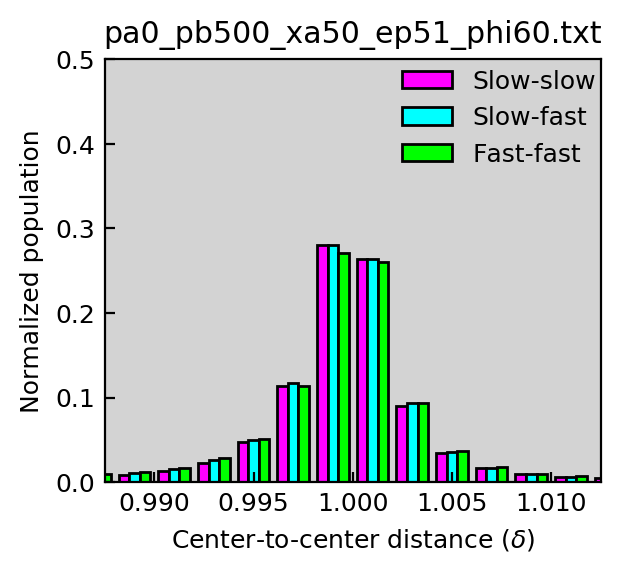

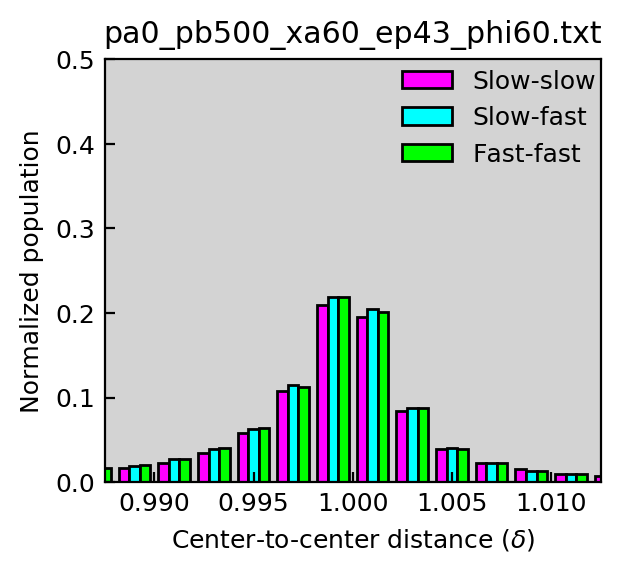

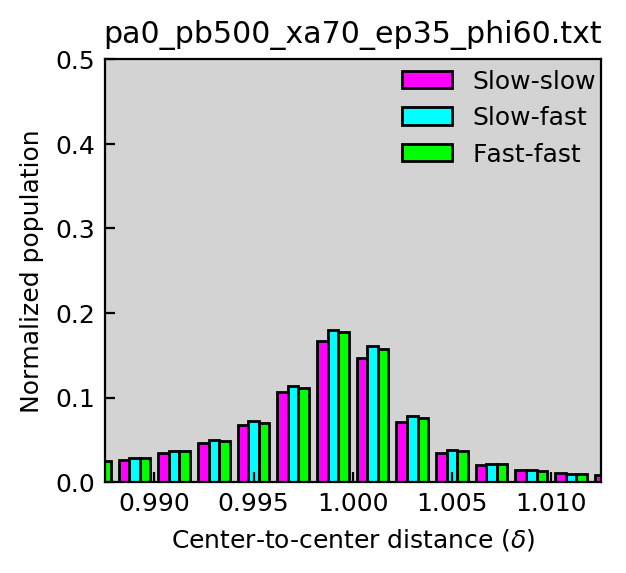

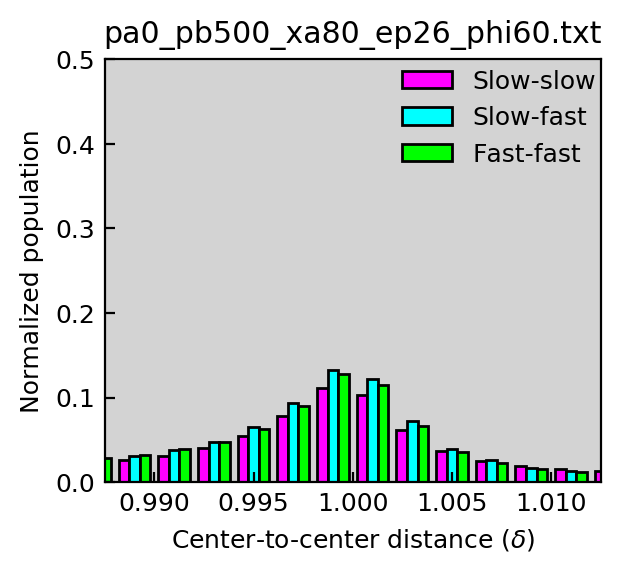

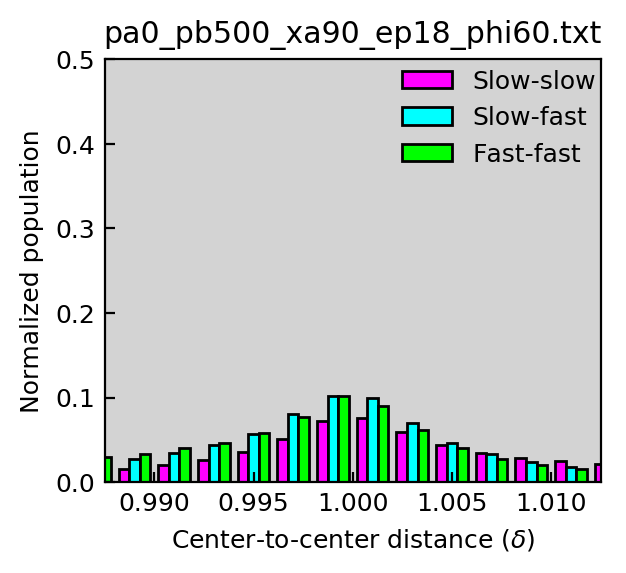

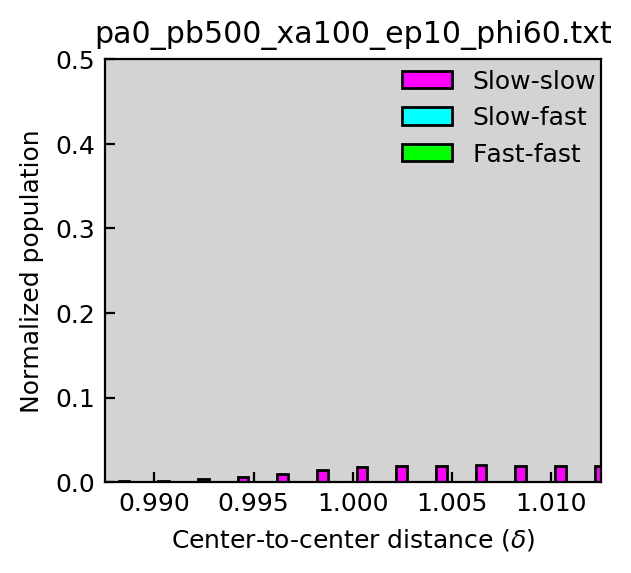

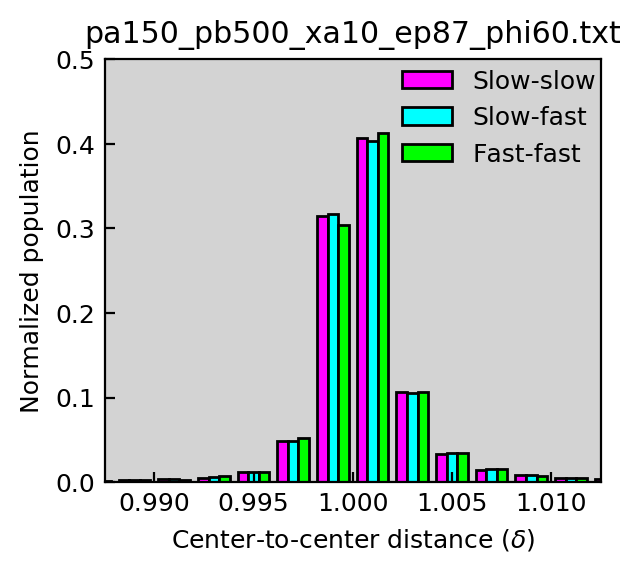

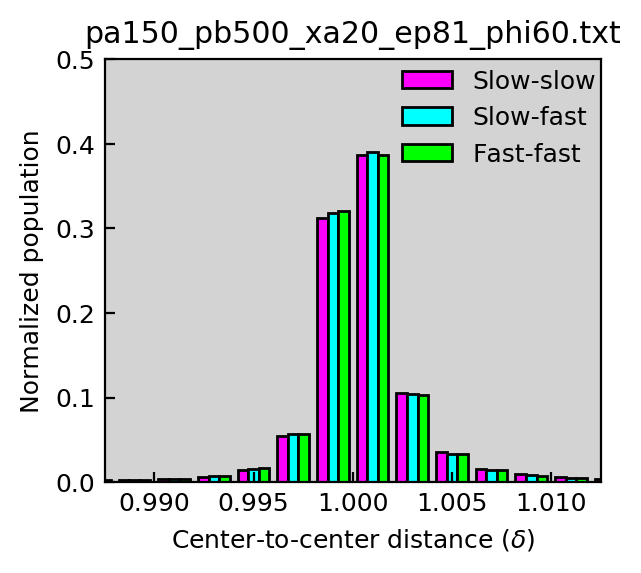

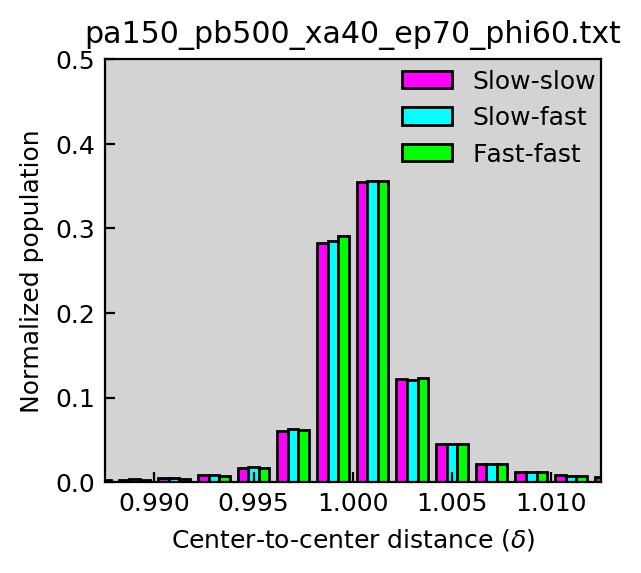

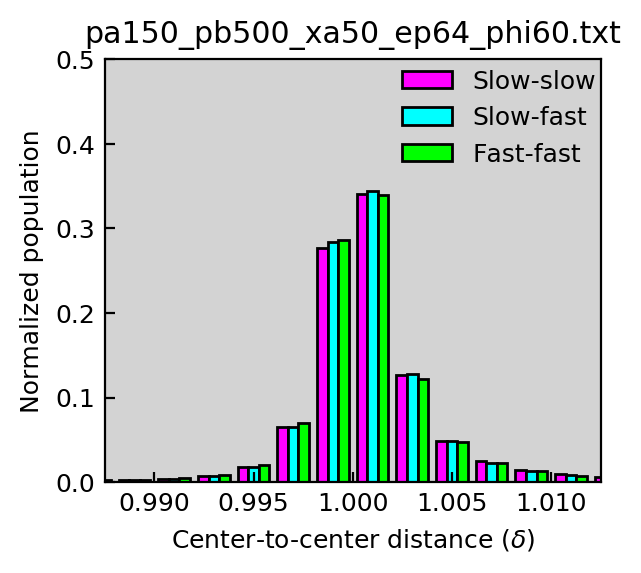

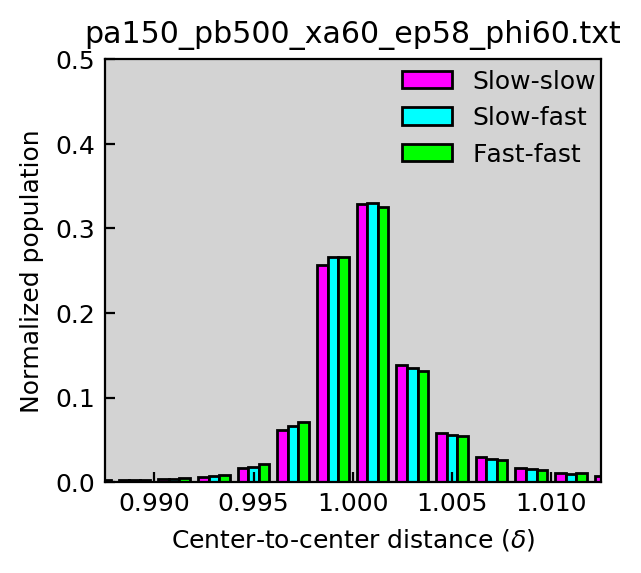

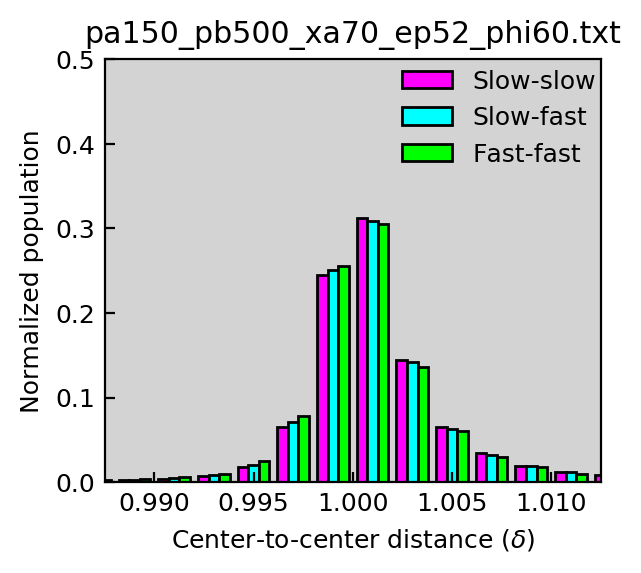

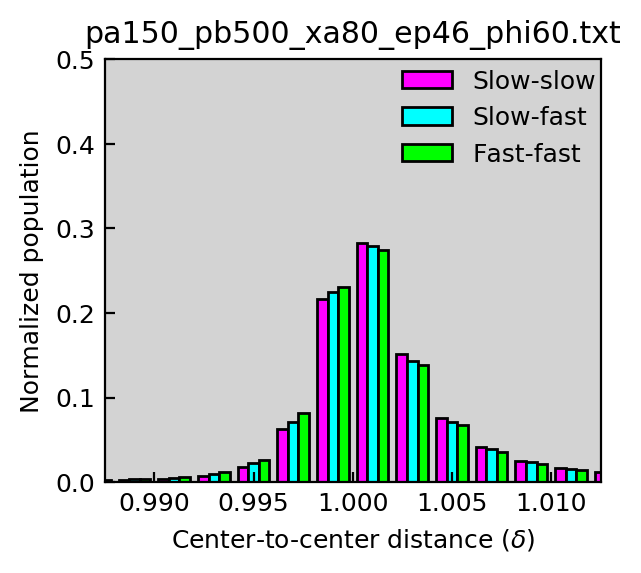

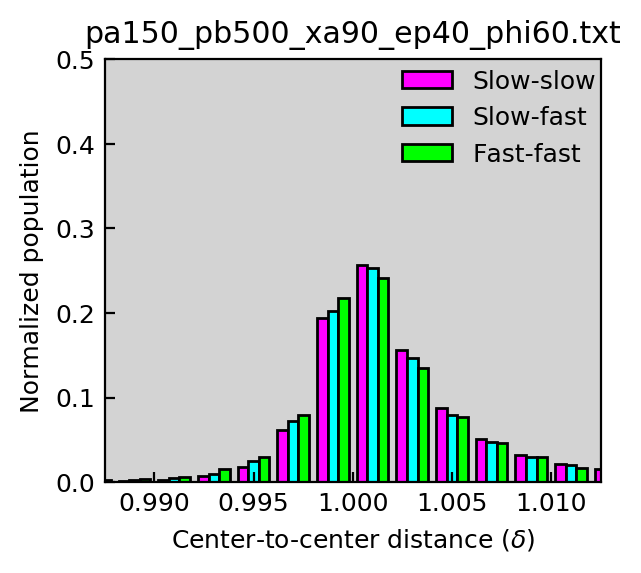

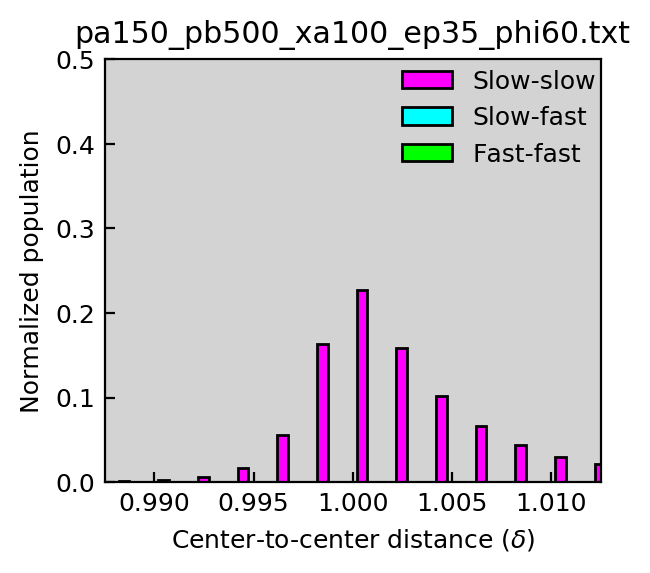

In [102]:
# Let's use conventional matplotlib histogram function (in raw value of delta)
headers = list(sims[0])
headers.remove('ALL')
overlayLabl = ['Slow-slow', 'Slow-fast', 'Fast-fast']
overlayColr = ['#ff00ff', '#00ffff', '#00ff00']
for i in xrange(nFiles):
    overlayData = []
    overlayWeig = []
    fig, ax = plt.subplots()
    for j in headers:
        plotDat = sims[i][j][~np.isnan(sims[i][j])]
        weights = np.ones_like(plotDat) / float(len(plotDat))
        overlayData.append(plotDat)
        overlayWeig.append(weights)
#         ax.hist(plotDat, weights=weights, bins=100, range=(0.9, 1.1), histtype='step', label=j)
    ax.hist(overlayData, weights=overlayWeig,
            bins=50, range=(0.95, 1.05),
            label=overlayLabl,
            color=overlayColr,
            edgecolor='k')
    ax.set_xlim(0.9875, 1.0125)
    ax.set_ylim(0, 0.5)
    ax.set_xlabel(r'Center-to-center distance $(\delta)$')
    ax.set_ylabel(r'Normalized population')
    ax.set_facecolor('#d3d3d3')
    ax.set_title(Files[i])
    plt.legend(bbox_to_anchor=(0.58, 1), loc=2, borderaxespad=0., frameon=False)
    plt.show()
    plt.close()